In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
RESULT_PATH = 'results/time'
time_file = 'training-history.csv'

In [3]:
df = pd.read_csv(os.path.join(RESULT_PATH, time_file))

In [4]:
df

,dataset,n_samples,n_features,n_clusters,python,spark2,spark4,spark8,snowflake
0,a3,7500,2,50,3.300002e+03,30623.991,37865.325,43777.674,316253.581
1,a3e1,10000,2,50,4.355168e+03,21998.200,23659.592,25415.885,289912.947
2,a3e2,100000,2,50,3.890465e+04,105687.829,107992.186,112095.024,1066979.312
3,a3e3,1000000,2,50,3.866083e+05,980548.238,31116.620,946648.138,NaN
4,dim032,1024,32,16,1.956998e+03,26376.726,21628.543,39474.140,227974.169
5,dim032e1,10000,32,16,2.726758e+04,23800.785,101727.403,24589.950,437876.670
6,dim032e2,100000,32,16,3.146399e+05,103837.309,28894.438,108352.443,3620311.479
7,dim032e3,1000000,32,16,3.348511e+06,944623.409,27157.140,956134.166,NaN
8,dim128,1024,128,16,6.356976e+03,22564.865,127634.801,40330.090,274883.249
9,dim128e1,10000,128,16,1.019370e+05,25476.006,409849.699,30214.164,1524318.141


In [5]:
df[df['dataset'].str.contains('a3')]

,dataset,n_samples,n_features,n_clusters,python,spark2,spark4,spark8,snowflake
0,a3,7500,2,50,3300.002,30623.991,37865.325,43777.674,316253.581
1,a3e1,10000,2,50,4355.168,21998.200,23659.592,25415.885,289912.947
2,a3e2,100000,2,50,38904.652,105687.829,107992.186,112095.024,1066979.312
3,a3e3,1000000,2,50,386608.289,980548.238,31116.620,946648.138,NaN


In [6]:
times = df.columns[4:]

In [7]:
datasets = ['a3', 'dim032', 'dim128', 'dim512']
samples = [10000, 100000, 1000000]
colors = ['#EE6666', '#3388BB', '#9988DD', '#EECC55', '#88BB44', '#FFBBBB']

In [8]:
from matplotlib import cycler
colors = cycler('color',
                ['#EE6666', '#3388BB', '#9988DD',
                 '#EECC55', '#88BB44', '#FFBBBB'])
plt.rc('axes', facecolor='#E6E6E6', edgecolor='none',
       axisbelow=True, grid=True, prop_cycle=colors)
plt.rc('grid', color='w', linestyle='solid')
plt.rc('xtick', direction='out', color='gray')
plt.rc('ytick', direction='out', color='gray')
plt.rc('patch', edgecolor='#E6E6E6')
plt.rc('lines', linewidth=3)

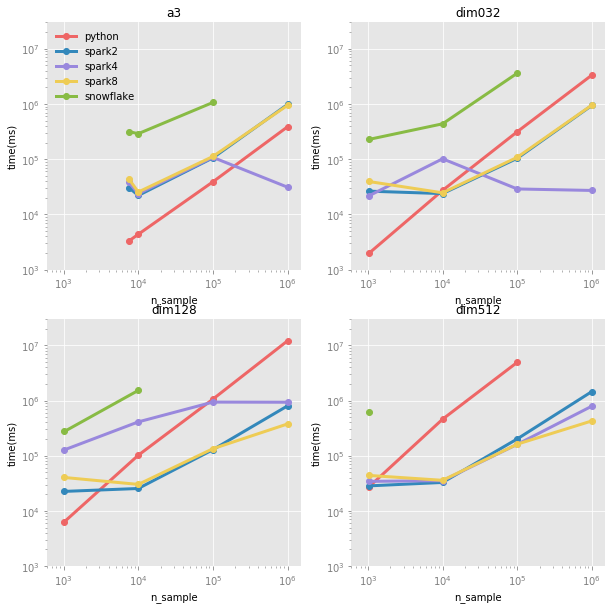

In [21]:
# sample size
fig, axe = plt.subplots(2, 2, figsize=(10,10))
for i in range(4):
    ri = i//2
    ci = i%2
    subdf = df[df['dataset'].str.contains(datasets[i])]
    x = subdf['n_samples']
    for j in range(len(times)):
        axe[ri][ci].plot(x, subdf[times[j]], marker='o')
        if i == 0:
            axe[ri][ci].legend(times, loc='upper left', frameon=False)
    axe[ri][ci].set_xscale('log')
    axe[ri][ci].set_yscale('log')
    axe[ri][ci].set_title(datasets[i])
    axe[ri][ci].set_xlabel('n_sample')
    axe[ri][ci].set_ylabel('time(ms)')
    axe[ri][ci].set_xlim(600, 1500000)
    axe[ri][ci].set_ylim(1000, 30000000)
#fig.legend(times, bbox_to_anchor=(1.04, 0.53))
#fig.tight_layout()
fig.savefig('results/comparison-sample-size.png', dpi=200)

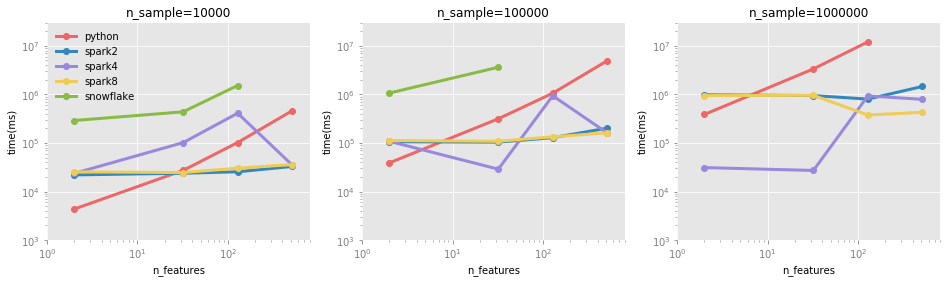

In [19]:
# dimension
fig, axe = plt.subplots(1, 3, figsize=(16,4))
for i in range(3):
    subdf = df[df['n_samples']==samples[i]]
    x = subdf['n_features']
    for j in range(len(times)):
        axe[i].plot(x, subdf[times[j]], marker='o')
    axe[i].set_xscale('log')
    axe[i].set_yscale('log')
    axe[i].set_title(f"n_sample={samples[i]}")
    axe[i].set_xlabel('n_features')
    axe[i].set_ylabel('time(ms)')
    axe[i].set_xlim(1, 800)
    axe[i].set_ylim(1000, 30000000)
    if i == 0:
        axe[i].legend(times, loc='upper left', frameon=False)
#fig.tight_layout()
fig.savefig('results/comparison-feature.png', dpi=200)